In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=42,
                           n_clusters_per_class=1,
                           class_sep=2)

Text(0, 0.5, 'Feature 2')

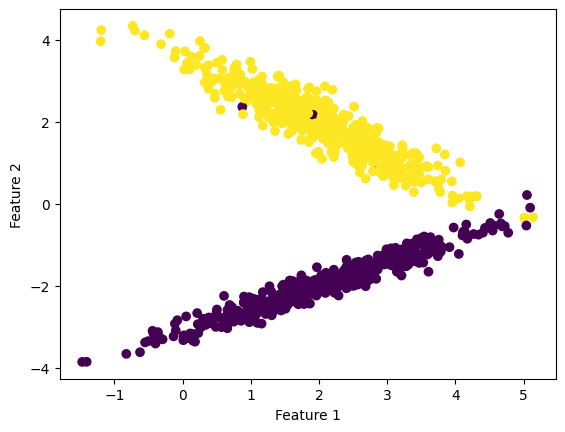

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [5]:
print(model.coef_)
print(model.intercept_)

[[0.23510705 3.31622252]]
[-0.60016608]


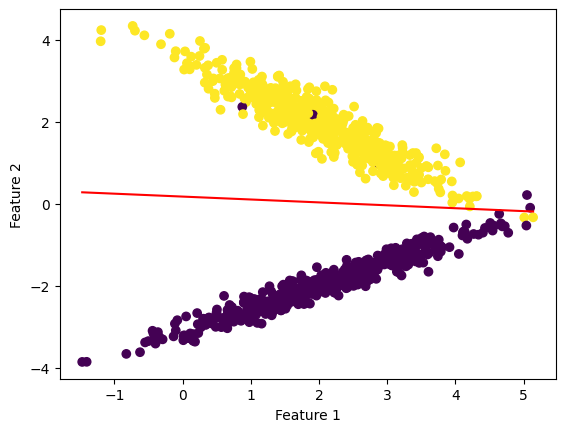

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y_values = -(model.coef_[0][0] * x_values + model.intercept_[0]) / model.coef_[0][1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(x_values, y_values, color='red')
plt.show()


In [7]:
import numpy as np
import pandas as pd

def signed_distance(x, y, model):
    num = model.coef_[0][0] * x + model.coef_[0][1] * y + model.intercept_[0]
    den = np.sqrt(model.coef_[0][0]**2 + model.coef_[0][1]**2)
    return num / den

distances = []
for i in range(len(X)):
    distances.append(signed_distance(X[i][0], X[i][1], model))

distances = np.array(distances)
sigmoid_distances = 1 / (1 + np.exp(-distances))


result_df = pd.DataFrame({'y': y, 'signed_distance': distances, 'sigmoid_distance': sigmoid_distances})

In [8]:
result_df["pred"] = result_df["sigmoid_distance"]>0.5

In [9]:
result_df

,y,signed_distance,sigmoid_distance,pred
0,1,2.461702,0.921413,True
1,0,-2.223261,0.097681,False
2,0,-1.957670,0.123719,False
3,0,-0.654957,0.341873,False
4,1,1.726495,0.848964,True
...,...,...,...,...
995,1,1.459404,0.811442,True
996,0,-1.793562,0.142637,False
997,1,1.299599,0.785768,True
998,1,2.501063,0.924216,True


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y, result_df["pred"])

0.992

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.995


In [19]:
example_point = np.array([[1, 2]])
predicted_class = knn.predict(example_point)
print(f"Predicted class for example point: {predicted_class}")

Predicted class for example point: [1]


In [22]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [23]:
def knn(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        pred_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(pred_label)
    return np.array(y_pred)

In [26]:
knn_mauel_pred = knn(X_train, y_train, X_test, 5)

In [27]:
accuracy = accuracy_score(y_test, knn_mauel_pred)
print(f"KNN Mauel Accuracy: {accuracy}")

KNN Mauel Accuracy: 0.995
